### A full picture of funnel conversion rate for both desktop and mobile

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
home_page=pd.read_csv('desktop/datachallenge/Funnel/home_page_table.csv')
payment_confirm=pd.read_csv('desktop/datachallenge/Funnel/payment_confirmation_table.csv')
payment_page=pd.read_csv('desktop/datachallenge/Funnel/payment_page_table.csv')
search=pd.read_csv('desktop/datachallenge/Funnel/search_page_table.csv')
user=pd.read_csv('desktop/datachallenge/Funnel/user_table.csv')

In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [5]:
home_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
all= pd.merge(user, home_page, how='left', left_on=['user_id'],right_on=['user_id'])

In [7]:
all.columns=['user_id','date','device','sex','home_page']
all.head()

,user_id,date,device,sex,home_page
0,450007,2015-02-28,Desktop,Female,home_page
1,756838,2015-01-13,Desktop,Male,home_page
2,568983,2015-04-09,Desktop,Male,home_page
3,190794,2015-02-18,Desktop,Female,home_page
4,537909,2015-01-15,Desktop,Male,home_page


In [8]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB


In [9]:
all= pd.merge(all, search, how='left', left_on=['user_id'],right_on=['user_id'])

In [10]:
all.columns=['user_id','date','device','sex','home_page','search_page']
all.head()

,user_id,date,device,sex,home_page,search_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page
3,190794,2015-02-18,Desktop,Female,home_page,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN


In [11]:
payment_page.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [12]:
all= pd.merge(all, payment_page, how='left', left_on=['user_id'],right_on=['user_id'])

In [13]:
all.columns=['user_id','date','device','sex','home_page','search_page','payment_page']
all.head()

,user_id,date,device,sex,home_page,search_page,payment_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN


In [14]:
payment_confirm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
user_id    452 non-null int64
page       452 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [15]:
all= pd.merge(all, payment_confirm, how='left', left_on=['user_id'],right_on=['user_id'])

In [16]:
all.columns=['user_id','date','device','sex','home_page','search_page','payment_page','confirmation']
all.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [17]:
all['home_page']=all['home_page'].replace('home_page',1)
all['search_page']=all['search_page'].fillna(0)
all['search_page']=all['search_page'].replace('search_page',1)
all['payment_page']=all['payment_page'].fillna(0)
all['payment_page']=all['payment_page'].replace('payment_page',1)
all['confirmation']=all['confirmation'].fillna(0)
all['confirmation']=all['confirmation'].replace('payment_confirmation_page',1)

In [27]:
all.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation,year,month,day
0,450007,2015-02-28,Desktop,Female,1,0,0,0,2015,2,28
1,756838,2015-01-13,Desktop,Male,1,0,0,0,2015,1,13
2,568983,2015-04-09,Desktop,Male,1,1,0,0,2015,4,9
3,190794,2015-02-18,Desktop,Female,1,1,0,0,2015,2,18
4,537909,2015-01-15,Desktop,Male,1,0,0,0,2015,1,15


In [24]:
all['date'] = pd.to_datetime(all.date)
all['year'] = all['date'].map(lambda date: date.year)
all['month'] = all['date'].map(lambda date: date.month)
all['day'] = all['date'].map(lambda date: date.day)

In [47]:
all.groupby('device')['confirmation'].mean()

device
Desktop    0.002492
Mobile     0.010000
Name: confirmation, dtype: float64

In [51]:
all.groupby('device')['search_page'].mean()

device
Desktop    0.5
Mobile     0.5
Name: search_page, dtype: float64

In [57]:
all[all.search_page==1].groupby('device')['payment_page'].mean()

device
Desktop    0.1
Mobile     0.2
Name: payment_page, dtype: float64

In [82]:
all[all.payment_page==1].groupby('device')['confirmation'].mean()

device
Desktop    0.049834
Mobile     0.100000
Name: confirmation, dtype: float64

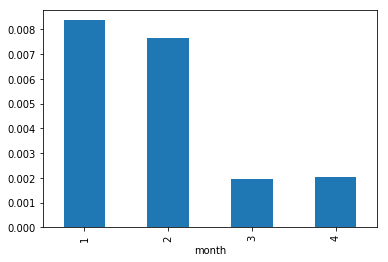

In [42]:
all.groupby('month')['confirmation'].mean().plot(kind='bar')
plt.show()

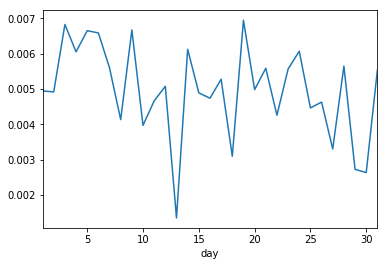

In [94]:
all.groupby('day')['confirmation'].mean().plot()
plt.show()

In [44]:
def general_rate(df):
    total_users_at_home_page = df['home_page'].sum()
    total_users_at_search_page = df['search_page'].sum()
    total_users_at_payment_page = df['payment_page'].sum()
    total_users_at_payment_confirmation = df['confirmation'].sum()
    home_to_search = total_users_at_search_page/total_users_at_home_page
    home_to_payment = total_users_at_payment_page/total_users_at_home_page
    home_to_confirmation = total_users_at_payment_confirmation/total_users_at_home_page
    y=[home_to_search,home_to_payment,home_to_confirmation]
    labels = ['home_to_search', 'home_to_payment', 'home_to_confirmation']
    y=pd.DataFrame(y,index=labels)
    y.columns=['confirmation_rate']
    return(y)

def level_rate(df):
    total_users_at_home_page = df['home_page'].sum()
    total_users_at_search_page = df['search_page'].sum()
    total_users_at_payment_page = df['payment_page'].sum()
    total_users_at_payment_confirmation = df['confirmation'].sum()
    home_to_search = total_users_at_search_page/total_users_at_home_page
    search_to_payment = total_users_at_payment_page/total_users_at_search_page
    payment_to_confirmation = total_users_at_payment_confirmation/total_users_at_payment_page
    y=[home_to_search,search_to_payment,payment_to_confirmation]
    labels = ['home_to_search',  'search_to_payment', 'payment_to_confirmation']
    y=pd.DataFrame(y,index=labels)
    y.columns=['confirmation_rate']
    return(y)

In [39]:
a=general_rate(all)
b=general_rate(all[all.device=='Desktop'])
c=general_rate(all[all.device=='Mobile'])
generalrate=pd.concat([a,b,c],axis=1)
generalrate.columns=['all','desktop','mobile']
generalrate

,all,desktop,mobile
home_to_search,0.500000,0.500000,0.50
home_to_payment,0.066704,0.050000,0.10
home_to_confirmation,0.005000,0.002492,0.01


In [45]:
a=level_rate(all)
b=level_rate(all[all.device=='Desktop'])
c=level_rate(all[all.device=='Mobile'])
levelrate=pd.concat([a,b,c],axis=1)
levelrate.columns=['all','desktop','mobile']
levelrate

,all,desktop,mobile
home_to_search,0.500000,0.500000,0.5
search_to_payment,0.133407,0.100000,0.2
payment_to_confirmation,0.074959,0.049834,0.1


In [52]:
all.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation,year,month,day
0,450007,2015-02-28,Desktop,Female,1,0,0,0,2015,2,28
1,756838,2015-01-13,Desktop,Male,1,0,0,0,2015,1,13
2,568983,2015-04-09,Desktop,Male,1,1,0,0,2015,4,9
3,190794,2015-02-18,Desktop,Female,1,1,0,0,2015,2,18
4,537909,2015-01-15,Desktop,Male,1,0,0,0,2015,1,15


In [56]:
Jan=level_rate(all[all.month==1])
Feb=level_rate(all[all.month==2])
Mar=level_rate(all[all.month==3])
Apr=level_rate(all[all.month==4])
Month_rate=pd.concat([Jan,Feb,Mar,Apr],axis=1)
Month_rate.columns=['Jan','Feb','Mar','Apr']
Month_rate

,Jan,Feb,Mar,Apr
home_to_search,0.599735,0.605619,0.392876,0.401770
search_to_payment,0.176332,0.176226,0.071067,0.065749
payment_to_confirmation,0.079079,0.071725,0.069731,0.077052


It seems like the home_to_search rate and the search_to payment rate are much lower in March and April than Jan and Feb.

In [57]:
all['sex']=all['sex'].replace('Male',1)
all['sex']=all['sex'].replace('Female',0)
all['device']=all['device'].replace('Mobile',1)
all['device']=all['device'].replace('Desktop',0)

In [58]:
feature_cols = ['home_page','device', 'sex', 'search_page', 'payment_page', 'month', 'day']
X = all[feature_cols].values
labels =all['confirmation'].values
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20,random_state = 42)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
def search_best_params(X, y, clf, params):
    model = GridSearchCV(clf, params, cv = 5, n_jobs =1)
    model.fit(X, y)
    best_parameter = model.best_params_
    return best_parameter

ada_clf = AdaBoostClassifier(random_state=42)
ada_parameters = {'n_estimators' : [10, 50, 100, 200],
                     'learning_rate' : np.logspace(-4, 1, 5)} 

# search best parameters
ada_best_params = search_best_params(X_train, y_train,ada_clf,
                                      ada_parameters)
print (ada_best_params)
ada_clf_best = AdaBoostClassifier(random_state=42,**ada_best_params)

{'learning_rate': 0.0001, 'n_estimators': 10}


In [60]:
ada_clf_best.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.0001, n_estimators=10, random_state=42)

In [61]:
ada_clf_best.feature_importances_

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [62]:
weights = ada_clf_best.feature_importances_
xlabels = feature_cols
for (w, l) in zip(weights, xlabels):
    print(l, '%.2f'%w)

home_page 0.00
device 0.00
sex 0.00
search_page 0.00
payment_page 1.00
month 0.00
day 0.00


### Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve

The conversion rate from home page to search page is the same for desktop and mobile, while other conversion rates are higher for mobile users as compared to desktop users.

There are higher conversion rates in Jan and Feb from home to search, to payment, to confirmation and from search to payment or to confirmation as compared to those conversion rates on March and April, and the conversion rates from home page to search page, to payment page and from search to payment page decreased at the end of month.Usually, the conversion rates are high at the beginning of the month.

The payment page visiting is identified as the most important features by the algorithm.


It is very clear that there is no change in number of users coming to the site. However, for mobile users there is a problem moving from homepage to searchpage, but for desktop users there is a problem moving from search page to payment confirmation page. For both mobile users and desktop user something happened at the beginning of march. To fix this problem these page transitions need to be analyzed and fixed. 